<a href="https://colab.research.google.com/github/DhruvArora96/Hands-On/blob/master/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
housing_url = "https://raw.githubusercontent.com/DhruvArora96/Hands-On/master/datasets/housing/housing.csv" 
housing_data = pd.read_csv(housing_url)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
housing = housing_data
housing.hist(bins=50,figsize=(20,15))


In [26]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
import hashlib
import numpy as np
def test_set_check(identifier, test_ratio, hash):
  return hash(np.int64(identifier)).digest()[-1]<256*test_ratio
def split_train_test_by_id(data, test_ratio, id_column,hash=hashlib.md5):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio,hash))
  return data.loc[~in_test_set],data.loc[in_test_set]


In [0]:
housing_with_id=housing.reset_index()
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

In [0]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

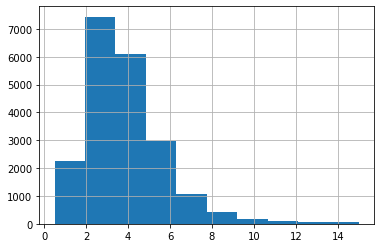

In [28]:
housing["median_income"].hist()

In [0]:
#reducing the number of strate
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [0]:
#sampling based onn income
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [38]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [43]:
test_set["income_cat"].value_counts()/len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [0]:
for set in (strat_train_set,strat_test_set):
  set.drop(["income_cat"],axis=1,inplace=True)

In [0]:
housing = strat_test_set.copy()

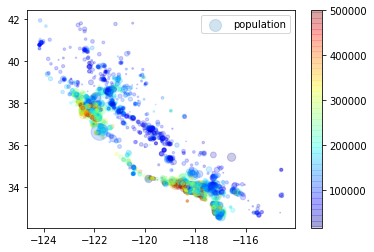

In [58]:
plt.scatter(housing["longitude"],housing["latitude"],alpha=0.2,s=housing["population"]/100,label="population",c=housing["median_house_value"],cmap=plt.get_cmap("jet"))
plt.legend()
plt.colorbar()

In [0]:
corr_matrix=housing.corr()